Student Name: Fergus Mc Hale
Student ID: 18203485

- Making use of Numpy, write a Python class to apply the PCA transform to the provided (see Notebook) data set. Compare the output of your implementation to the PCA functionality provided by the Scikitlearn module.

- Create a 'fit' method that calculates the eigen vectors and eigen values of your dataset. Compare your results to the output of Scikitlearn's fit method and document your findings as a comment (use markdown) directly under the cell with your PCA class.
- Use the Scikitlean's PCA class with n_components=2 and n_components=1 and observe the differences. In the cell directly below, comment on what you have observed.
- Add a property to your class and initialise this property in a suitable fashion to allow you to choose the number of principal components similar to the Scikitlearn PCA class.
- Store those results from your fit method that are required to transform the data set, in suitable class properties.
- Create a 'transform' method to perform the PCA data transformation on your data set using the parameters obtained using your 'fit' method.
 

- N.B.:

- Limit your code to the aspects explicitly listed. 
- Use the Jupyter Notebook provided in the repository for week 5. This notebook contains the data that needs to be transformed.
- The required modules have already been imported for you. You should not import any other modules.
- If you find creating a class with this functionality daunting, please start by creating normal functions in your notebook. If time permits, you can then change to use of a class later. 
 

- HINTS:

- Numpy.mean() will 'flatten' your tensor by default. To obtain the mean along a given axis, you may use the axis parameter.

- Numpy.cov() assumes by default that data is presented with one observation per column. This can be changed using the rowvar parameter. 

- A Numpy.matrix is a convenient way of performing the matrix operations required for PCA whilst retaining a matrix/vector like structure. Use of this class is discouraged, but would form a good starting point for tackling this week's challenge. Once you have the code working with the matrix class, changing to arrays is relatively straight forward.

- You can use Scikitlearn as follows to check the Eigen vectors that you have found with your 'fit' mehod:

- pca = PCA(n_components=2)
- pca.fit(data)
- print(pca.components_)

- You can use Scikitlearn to obtain 
- GIT push your implementation and post your manual calculations to E-tivity 5: Linear Algebra in Numpy and Beyond and provide the name of your branch.

- The 'as' keyword allows you to invoke functionality from the module using an alias for the module name. For example: np.mean() instead of numpy.mean()
- The from keyword allows you to only import the functionality of interest, for example above we import only the PCA class from the sklearn.decomposition module
- As per E-tivity instructions: Use of the matrix class is discouraged, but to allow us to simplify the code slightly, we will use it this week. 
- Its first use will be to store the data that you will perform the PCA transform on. Note that you will likely obtain a higher score if your final version does not use the matrix class.
- The numpy shape property is very useful to get an insight in the dimensions of your data, for example to check whether the features (in this case 2) or the samples (in this case 20) are in the rows or the columns. The notation used here (with columns containing the features and rows containing separate examples) is the standard for Scikitlearn and many other machine learning algorithms.
- data.shape

2. Use the Scikitlean's PCA class with n_components=2 and n_components=1 and observe the differences. In the cell directly below, comment on what you have observed

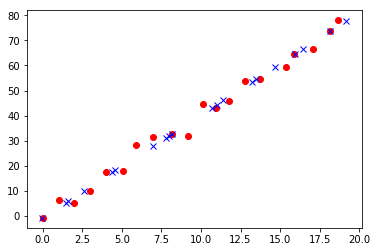

In [4]:
from sklearn.decomposition import PCA
import numpy as np
import random as rand
import matplotlib.pyplot as plt

a_x = 0.05
a_y= 10
data =  np.matrix([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])

pca = PCA(n_components=1)
pca.fit(data)
data_pca = pca.transform(data)
data_reduced = pca.inverse_transform(data_pca)

plt.plot(data[:,0], data[:,1], 'or')
plt.plot(data_reduced[:,0], data_reduced[:,1],'xb')
plt.show()

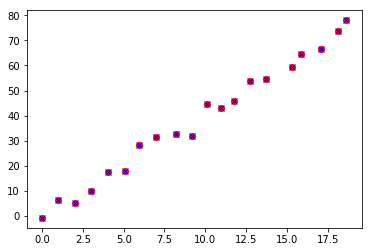

In [5]:
from sklearn.decomposition import PCA
import numpy as np
import random as rand

a_x = 0.05
a_y= 10

pca = PCA(n_components=2)
pca.fit(data)
data_pca = pca.transform(data)
data_reduced = pca.inverse_transform(data_pca)

plt.plot(data[:,0], data[:,1], 'or')
plt.plot(data_reduced[:,0], data_reduced[:,1],'xb')
plt.show()

- Observation:




- Investigation Phase

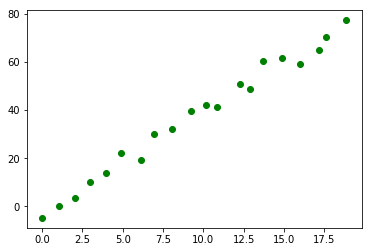

In [6]:
import matplotlib.pyplot as plt
data =  np.matrix([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])
plt.plot(data[:, 0], data[:, 1], 'go')

In [52]:
from sklearn.decomposition import PCA
import numpy as np
import random as rand
import matplotlib.pyplot as plt

a_x = 0.05
a_y= 10
data =  np.array([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])

# get mean of data
def get_mean(data):
    return np.mean(data.T, axis=1)

# get covariance
def get_covariance(data):
    return np.cov(data)

# get eigenvalues
def get_eigen_values(data):
    return np.linalg.eig(data)


mean_m = get_mean(data)
print(mean_m)
cov_matrix = get_covariance(data - mean_m)
print(cov_matrix)
eigen_value, eigen_vector = get_eigen_values(cov_matrix)
print(eigen_value, eigen_vector)


[ 9.51752045 38.21820667]
[[ 403.68513647  322.47071676  299.27927672  274.54240342  180.68986901
   256.11305627  184.52945421   51.26416738   53.67868938   92.96694368
    47.54631231  -24.18836182 -161.15667279 -137.5273176  -215.87628365
  -186.91271759 -314.04814727 -246.15843098 -417.55252188 -463.34557205]
 [ 322.47071676  257.59522403  239.06949788  219.30925271  144.33821389
   204.58756929  147.40534141   40.95070961   42.87947183   74.26361353
    37.98082224  -19.32208464 -128.7347566  -109.85921619 -172.44573463
  -149.30913369 -250.86712885 -196.63564125 -333.54822571 -370.12851162]
 [ 299.27927672  239.06949788  221.87610438  203.53697598  133.95770224
   189.87404617  136.80424817   38.00561762   39.79566717   68.92272504
    35.24931853  -17.93247949 -119.47641396 -101.95836414 -160.04378709
  -138.57112357 -232.82527366 -182.49400467 -309.56011369 -343.50961962]
 [ 274.54240342  219.30925271  203.53697598  186.71366485  122.88545312
   174.18004198  125.49671832   34.